In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
df = pd.read_csv('insurance.csv')


df.head(10)




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#Checking and cleaning data

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [43]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [44]:
print(df.duplicated().sum())
print(df['sex'].unique())
print(df['age'].unique())
print(df['children'].unique())
print(df['smoker'].unique())
print(df['region'].unique())
df.nunique()

1
['female' 'male']
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [45]:
print("Minimum charges: $",df['charges'].min())
print("Maximum charges: $",df['charges'].max())
print("Minimum BMI:",df['bmi'].min())
print("Maximum BMI:",df['bmi'].max())

Minimum charges: $ 1121.8739
Maximum charges: $ 63770.42801
Minimum BMI: 15.96
Maximum BMI: 53.13


In [46]:
print(df.duplicated().sum())

1


In [47]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [48]:
df[(df["bmi"] == 30.59) & (df["charges"] ==1639.5631 )]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [49]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


#Categorizing data

In [50]:
df['age_group'] = df['age'].apply(lambda x: '<35' if x <35 else ('35-44' if x <=44 else ('45-54' if x <=54 else('55-64' if x <=64 else '65+'))))
df['bmi_group'] = df['bmi'].apply(lambda x: 'normal' if x <= 24.9 else ('overweight' if x <= 30 else 'obese'))
groups = (
    df.groupby(['sex','age_group','bmi_group','smoker'], observed=True)
      .agg(
          n=('charges', 'size'),
          median=('charges', 'median'),
          min=('charges', 'min'),
          max=('charges', 'max')
      )
      .reset_index()
)
cols_to_round = ['median', 'min', 'max']
groups[cols_to_round] = groups[cols_to_round].round(2)
groups['n'] = groups['n'].astype(int)

# смотреть топ по размеру группы
groups.sort_values('n', ascending=False).head()

groups.head().sort_values(by='n', ascending=False)

,sex,age_group,bmi_group,smoker,n,median,min,max
2,female,35-44,obese,no,48,6915.69,5240.77,28476.73
4,female,35-44,overweight,no,39,7050.64,4883.87,15828.82
0,female,35-44,normal,no,14,7607.02,5458.05,13725.47
3,female,35-44,obese,yes,12,41962.37,37270.15,48885.14
1,female,35-44,normal,yes,8,19696.43,18608.26,21880.82


/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91378/3772106234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


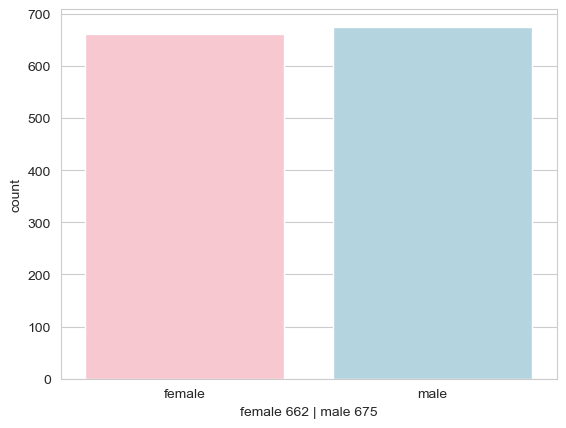

In [51]:
tot = df['sex'].value_counts()
ax = sns.countplot(
    data=df,
    x='sex',
    order=['female','male'],
    palette=['pink', 'lightblue']  # female -> pink, male -> lightblue
)
ax.set_ylabel('count')
ax.set_xlabel(f"female {tot.get('female',0)} | male {tot.get('male',0)}")
plt.show()

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91378/3553733884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


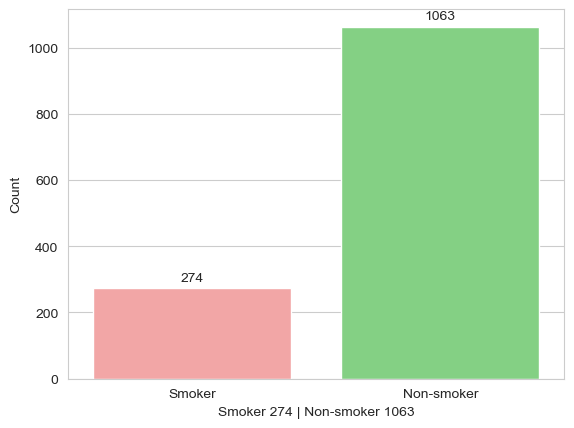

In [52]:

df_plot = df.copy()
df_plot['smoker'] = df_plot['smoker'].replace({'yes': 'Smoker', 'no': 'Non-smoker'})

tot = df_plot['smoker'].value_counts()

# Pastel red and green (order matches the 'order' parameter)
pastel_colors = ['#FF9999', '#77DD77']  # Smoker -> pastel red, Non-smoker -> pastel green

ax = sns.countplot(
    data=df_plot,
    x='smoker',
    order=['Smoker','Non-smoker'],
    palette=pastel_colors
)

ax.set_ylabel('Count')
ax.set_xlabel(f"Smoker {tot.get('Smoker',0)} | Non-smoker {tot.get('Non-smoker',0)}")

# Add counts on top of bars
for c in ax.containers:
    ax.bar_label(c, fmt='%d', padding=3)

plt.show()


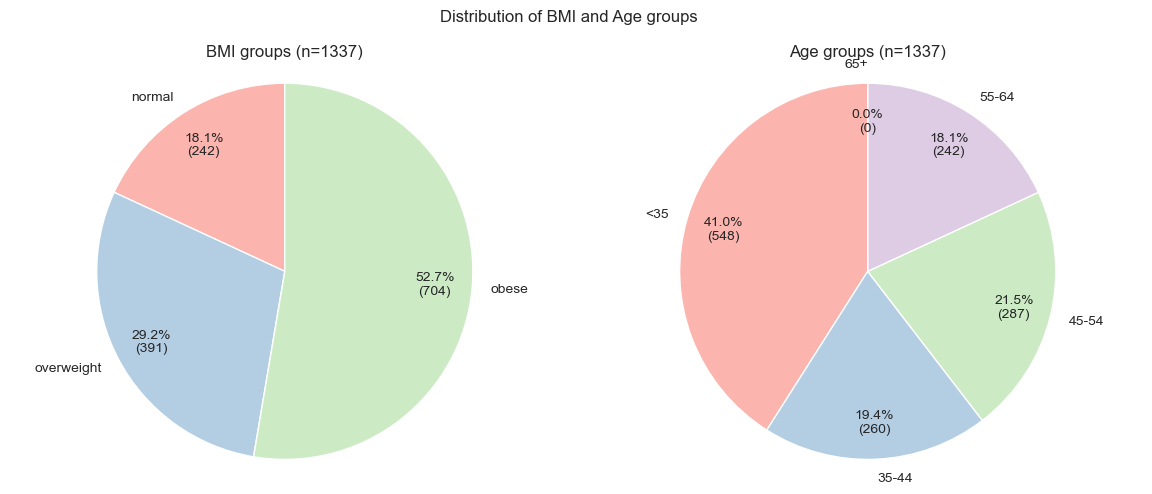

In [53]:
bmi_order = ['normal', 'overweight', 'obese']
age_order = ['<35', '35-44', '45-54', '55-64', '65+']

df_plot = df.copy()

df_plot['bmi_group'] = pd.Categorical(df_plot['bmi_group'], categories=bmi_order, ordered=True)
df_plot['age_group'] = pd.Categorical(df_plot['age_group'], categories=age_order, ordered=True)

bmi_counts = (df_plot['bmi_group'].value_counts()
              .reindex(bmi_order).fillna(0).astype(int))
age_counts = (df_plot['age_group'].value_counts()
              .reindex(age_order).fillna(0).astype(int))


def make_autopct(total):
    return lambda p: f"{p:.1f}%\n({int(round(p*total/100))})"

colors_bmi = plt.get_cmap('Pastel1').colors[:len(bmi_order)]
colors_age = plt.get_cmap('Pastel1').colors[:len(age_order)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


total_bmi = int(bmi_counts.sum())
axes[0].pie(bmi_counts.values, labels=bmi_counts.index.tolist(),
            autopct=make_autopct(total_bmi), startangle=90,
            colors=colors_bmi, pctdistance=0.8)
axes[0].axis('equal')
axes[0].set_title(f"BMI groups (n={total_bmi})")


total_age = int(age_counts.sum())
axes[1].pie(age_counts.values, labels=age_counts.index.tolist(),
            autopct=make_autopct(total_age), startangle=90,
            colors=colors_age, pctdistance=0.8)
axes[1].axis('equal')
axes[1].set_title(f"Age groups (n={total_age})")

plt.suptitle("Distribution of BMI and Age groups")
plt.tight_layout()
plt.show()



#Determining which factors impact the charges


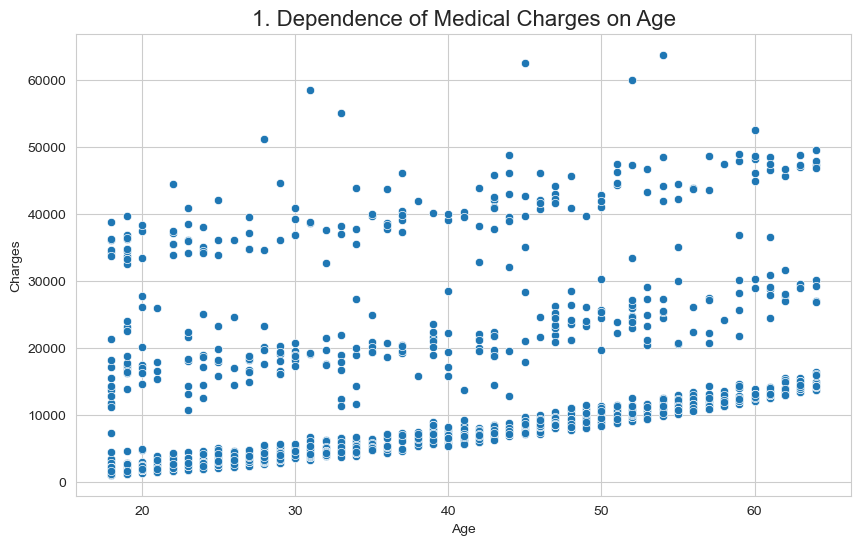

In [54]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create a scatter plot for charges vs. age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('1. Dependence of Medical Charges on Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

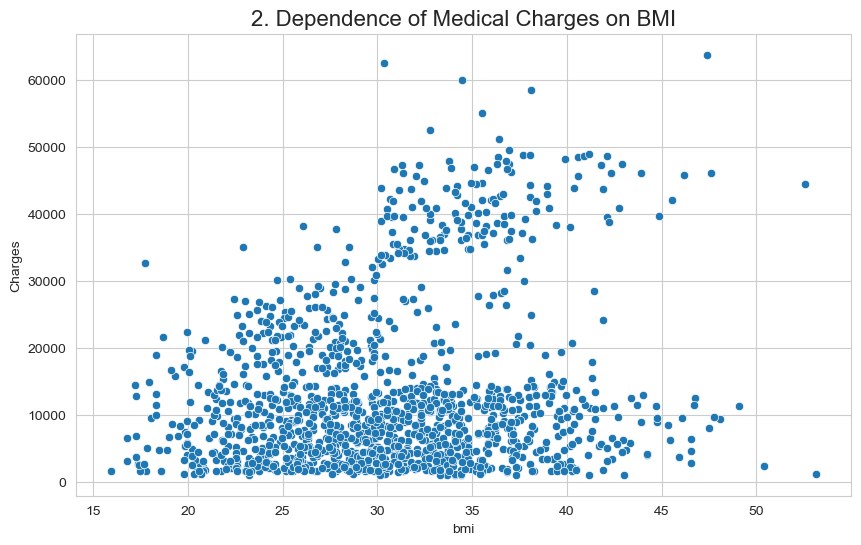

In [55]:
# Create a scatter plot for charges vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('2. Dependence of Medical Charges on BMI', fontsize=16)
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.show()

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91378/3323435853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='coolwarm')


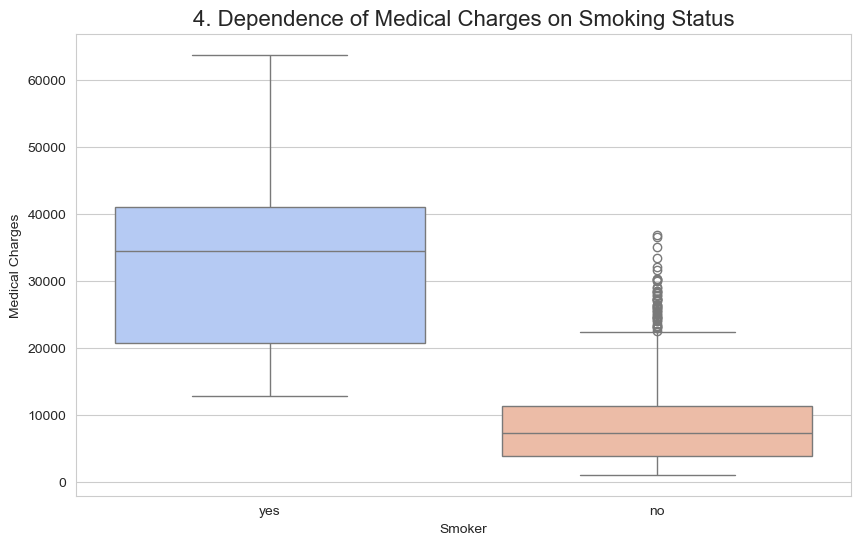

In [56]:
# Create a box plot for charges vs. smoker
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='coolwarm')
plt.title('4. Dependence of Medical Charges on Smoking Status', fontsize=16)
plt.xlabel('Smoker')
plt.ylabel('Medical Charges')
plt.show()

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91378/2238894894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette='coolwarm')


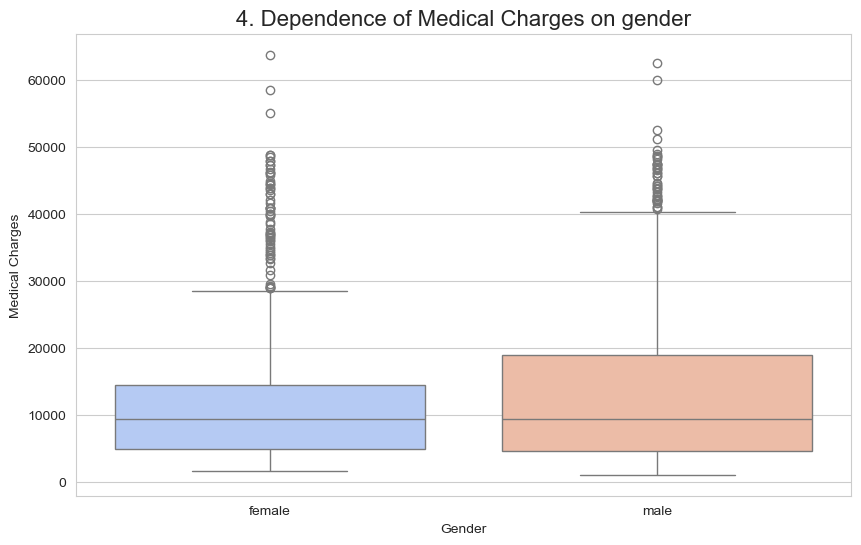

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df, palette='coolwarm')
plt.title('4. Dependence of Medical Charges on gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Medical Charges')
palette=['pink', 'lightblue']
plt.show()

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91378/2423673008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=df, palette='pastel')


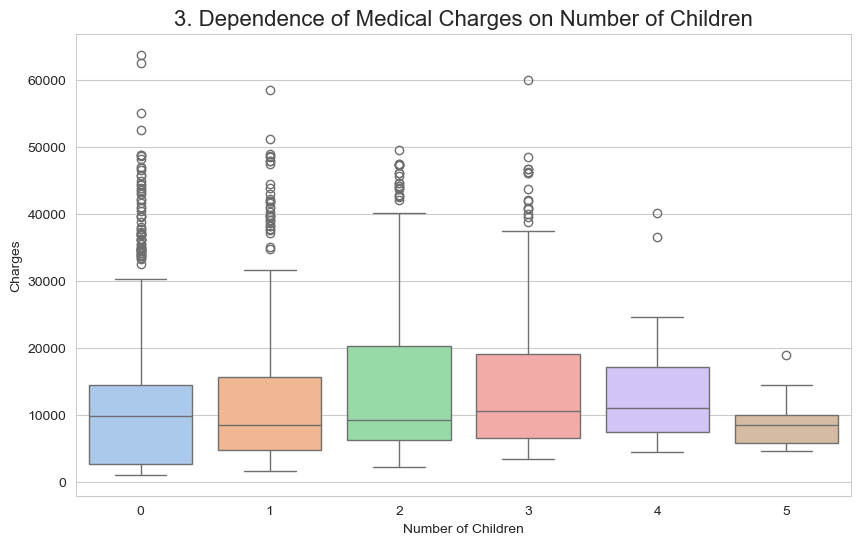

In [58]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df, palette='pastel')
plt.title('3. Dependence of Medical Charges on Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_91378/1403974554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='viridis')


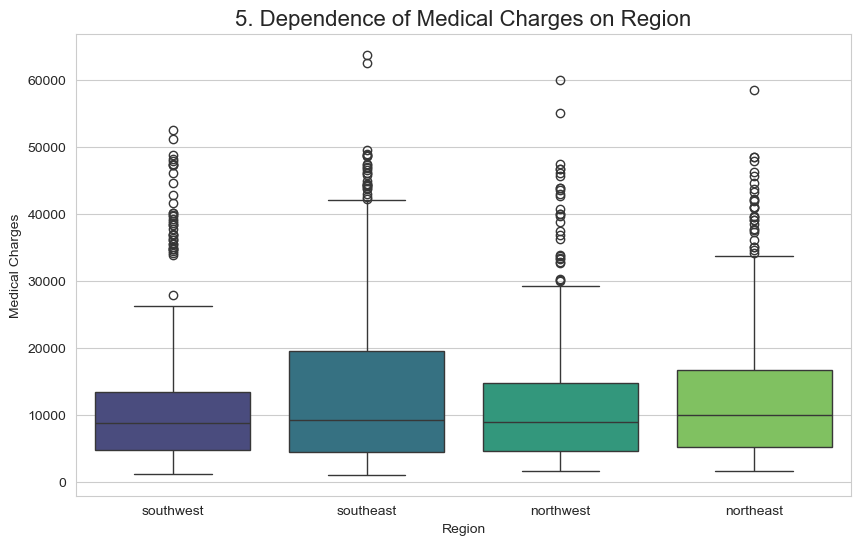

In [59]:
# Create a box plot for charges vs. region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, palette='viridis')
plt.title('5. Dependence of Medical Charges on Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Medical Charges')
plt.show()

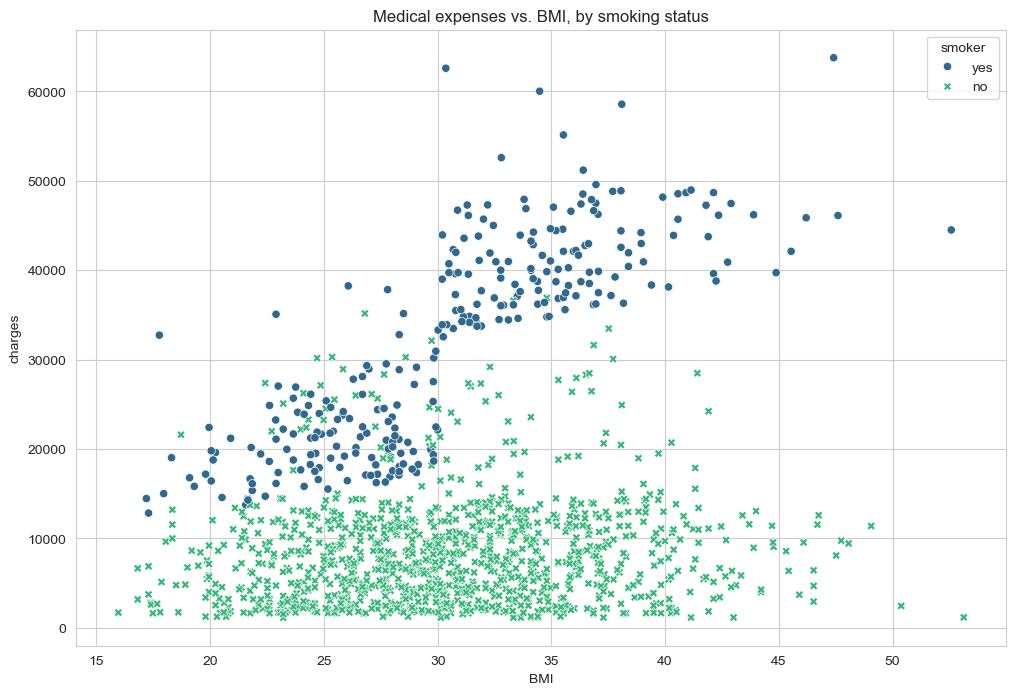

Conclusion: The visualization shows that smokers have significantly higher costs, regardless of their BMI.


In [60]:
# Charges: BMI & smoking

plt.figure(figsize=(12, 8))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='viridis', style='smoker')
plt.title('Medical expenses vs. BMI, by smoking status')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.show()
print("Conclusion: The visualization shows that smokers have significantly higher costs, regardless of their BMI.")


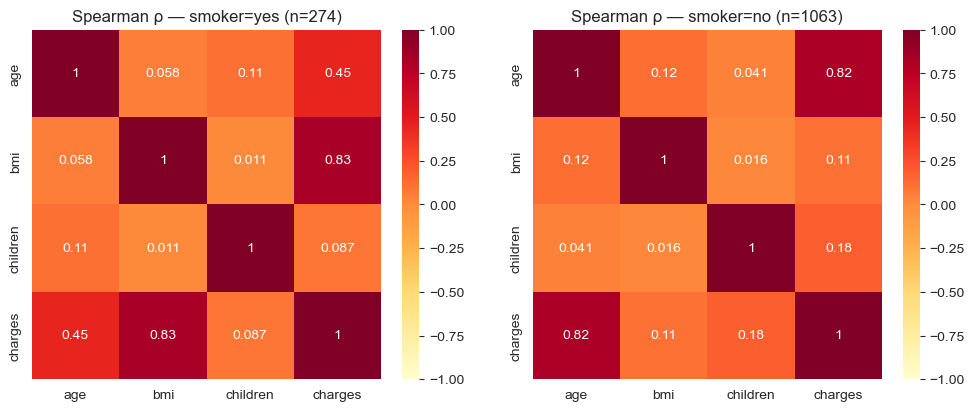

In [61]:
# 1) Normalize smoker values and coerce numeric columns
df = df.copy()
df["smoker"] = df["smoker"].astype(str).str.strip().str.lower()

num_cols = ["age", "bmi", "children", "charges"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

groups = ["yes", "no"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

for ax, s in zip(axes, groups):
    sub = df[df["smoker"] == s]
    n = len(sub)
    ax.set_title(f"Spearman ρ — smoker={s} (n={n})")

    if n < 3:
        ax.text(0.5, 0.5, "Not enough rows", ha="center", va="center")
        ax.axis("off")
        continue

    # 2) Drop columns that are all-NaN or constant in this subset
    usable = []
    for c in num_cols:
        series = sub[c].dropna()
        if series.nunique() >= 2:
            usable.append(c)
    if len(usable) < 2:
        ax.text(0.5, 0.5, "No varying numeric columns", ha="center", va="center")
        ax.axis("off")
        continue

    # 3) Let pandas compute Spearman (handles NaNs)
    mat = sub[usable].corr(method="spearman")

    # 4) Plot
    sns.heatmap(mat, annot=True, vmin=-1, vmax=1, cmap="YlOrRd", ax=ax, square=True)

plt.show()

#Finding how different factors impact charges

## Data Preprocessing

In [62]:
# categorical groups in order
AGE_GROUP = ["<35", "35-44", "45-54", "55-64", "65+"]
BMI_GROUP = ["normal","overweight","obese"]
SEX_GROUP = ['female','male']

# Bins
AGE_BINS = [0, 34, 44, 54, 64, np.inf]
BMI_BINS = [0, 25, 30, np.inf]

In [63]:
def categorize_feature(df, feature_col, group_list, bin_list, right=True, include_lowest=True):
  return pd.cut(df[feature_col], bins=bin_list, labels=group_list, right=right, include_lowest=include_lowest)

In [64]:
df['age_group'] = categorize_feature(df, 'age', group_list=AGE_GROUP, bin_list=AGE_BINS)
df[['age', 'age_group']].tail()

,age,age_group
1333,50,45-54
1334,18,<35
1335,18,<35
1336,21,<35
1337,61,55-64


In [65]:
df['bmi_group'] = categorize_feature(df, 'bmi', group_list=BMI_GROUP, bin_list=BMI_BINS)
df[['bmi', 'bmi_group']].tail()

,bmi,bmi_group
1333,30.97,obese
1334,31.92,obese
1335,36.85,obese
1336,25.80,overweight
1337,29.07,overweight


In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,<35,overweight
1,18,male,33.770,1,no,southeast,1725.55230,<35,obese
2,28,male,33.000,3,no,southeast,4449.46200,<35,obese
3,33,male,22.705,0,no,northwest,21984.47061,<35,normal
4,32,male,28.880,0,no,northwest,3866.85520,<35,overweight


## Smoking & BMI vs Charges



The “smoker premium” = the extra cost smokers pay at each BMI level.

### Create Median ratios

In [67]:
med = df.groupby(["bmi_group","smoker"], observed=False)["charges"].median().unstack()
prem_abs = (med["yes"] - med["no"]).rename("smoker_premium_$")
prem_rel = (med["yes"]/med["no"]).rename("smoker_premium_ratio")
smoker_premium = pd.concat([med.round(0), prem_abs.round(0), prem_rel.round(2)], axis=1)
sp = smoker_premium.reset_index().rename(
    columns={smoker_premium.index.name or 'index': 'bmi_group'})
sp

,bmi_group,no,yes,smoker_premium_$,smoker_premium_ratio
0,normal,6498.0,19362.0,12864.0,2.98
1,overweight,7047.0,21349.0,14302.0,3.03
2,obese,8100.0,40918.0,32818.0,5.05


In [68]:

med_long = sp.melt(
    id_vars="bmi_group",
    value_vars=["no","yes"],
    var_name="smoker",
    value_name="median_charges"
).dropna()
med_long

,bmi_group,smoker,median_charges
0,normal,no,6498.0
1,overweight,no,7047.0
2,obese,no,8100.0
3,normal,yes,19362.0
4,overweight,yes,21349.0
5,obese,yes,40918.0


## Plot 1 -  Median Charges by BMI group and smoker

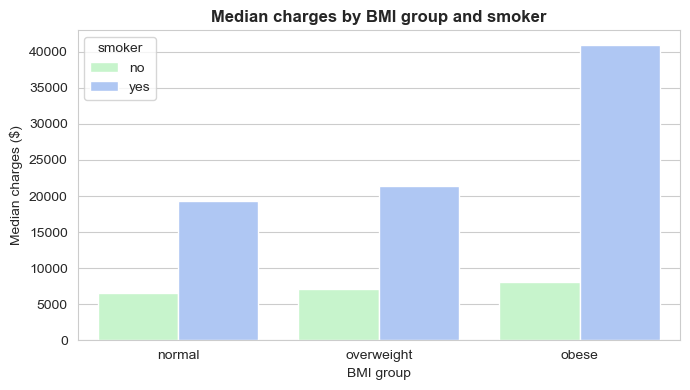

In [69]:
plt.figure(figsize=(7,4))

pastel_colors = {"no": "#BFFCC6", "yes": "#A3C4FF"}

sns.barplot(
    data=med_long,
    x="bmi_group",
    y="median_charges",
    hue="smoker",
    palette=pastel_colors
)

plt.title("Median charges by BMI group and smoker",fontweight="bold")
plt.xlabel("BMI group")
plt.ylabel("Median charges ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Plot 2 - Smoker Premium in $ and ratio

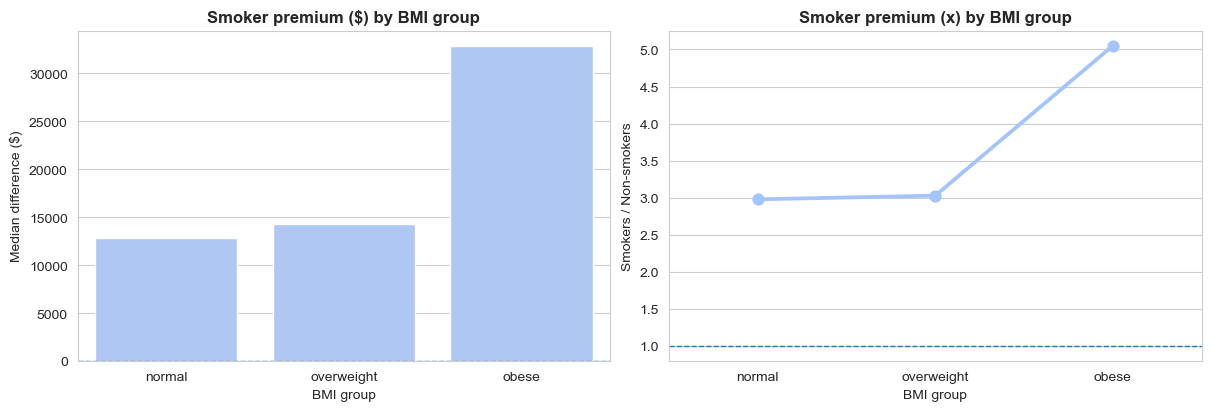

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

# Absolute $ - soft blue
sns.barplot(
    data=sp,
    x="bmi_group",
    y="smoker_premium_$",
    ax=axes[0],
    color="#A3C4FF"
)
axes[0].axhline(0, ls="--", lw=1)
axes[0].set_title("Smoker premium ($) by BMI group",fontweight="bold")
axes[0].set_xlabel("BMI group")
axes[0].set_ylabel("Median difference ($)")
axes[0].tick_params(axis="x", rotation=0)

# Ratio × - soft blue
sns.pointplot(
    data=sp,
    x="bmi_group",
    y="smoker_premium_ratio",
    ax=axes[1],
    markers="o",
    color="#A3C4FF",
    errorbar=None
)
axes[1].axhline(1, ls="--", lw=1)
axes[1].set_title("Smoker premium (x) by BMI group",fontweight="bold")
axes[1].set_xlabel("BMI group")
axes[1].set_ylabel("Smokers / Non-smokers")
axes[1].tick_params(axis="x", rotation=0)

plt.show()

Smoker premium (absolute $):

- Smokers consistently pay a large extra cost.

- The premium increases sharply with obesity, reaching over $30k difference.

Smoker premium (relative ×):

- For normal and overweight individuals, smokers pay about 3× more than non-smokers.

- For obese individuals, the multiplier jumps above 5×, showing a strong combined effect of obesity and smoking.

**Conclusion: Smoking greatly increases medical costs, and the effect is amplified when combined with obesity**

## Plot 3 - Focus on Obese Only: Median Charges by Age

### Feature Engineering

In [71]:
# Let's focus now on obese only
obese = df[df["bmi_group"] == "obese"].copy()

# Medians and plot
med_sm = (obese.groupby(["age_group","smoker"], observed=True)["charges"]
                .median().reset_index(name="median_charges"))
med_sm.head()


,age_group,smoker,median_charges
0,<35,no,3401.840175
1,<35,yes,36397.576000
2,35-44,no,6789.108725
3,35-44,yes,40143.068000
4,45-54,no,9778.347200


In [72]:
pv = (med_sm.pivot(index="age_group", columns="smoker", values="median_charges")
              .reindex(AGE_GROUP))
pv.head()


smoker,no,yes
age_group,,
<35,3401.840175,36397.57600
35-44,6789.108725,40143.06800
45-54,9778.347200,43254.41795
55-64,13019.161050,47298.18000
65+,NaN,NaN


### Plot

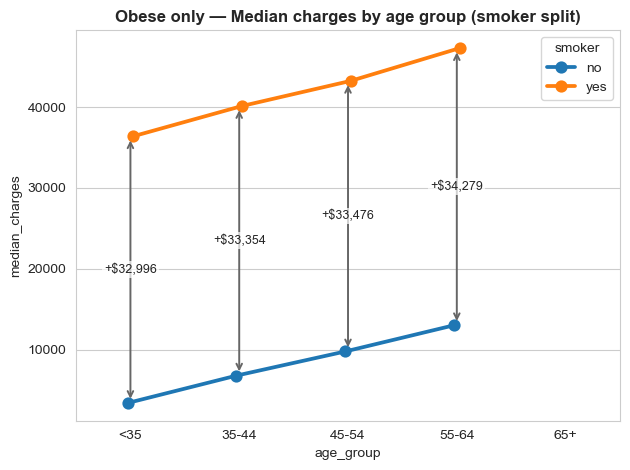

In [73]:
ax = sns.pointplot(data=med_sm, x="age_group", y="median_charges",
                   hue="smoker", order=AGE_GROUP, dodge=True,
                   markers="o", linestyles="-", errorbar=None)

for xi, lab in enumerate(AGE_GROUP):
    if lab not in pv.index:
        continue
    vals = pv.loc[lab, ["no","yes"]]
    if vals.notna().all():
        ax.annotate("", xy=(xi, vals["yes"]), xytext=(xi, vals["no"]),
                    arrowprops=dict(arrowstyle="<->", lw=1.4, color="#666",
                                    shrinkA=3, shrinkB=3))
        ax.text(xi, vals.mean(), f"+${(vals['yes']-vals['no']):,.0f}",
                ha="center", va="center", fontsize=9,
                bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.5))

ax.set_title("Obese only — Median charges by age group (smoker split)", fontweight="bold")
ax.set_xlabel("age_group"); ax.set_ylabel("median_charges")
plt.tight_layout(); plt.show()


**Conclusion:For obese individuals, smoking adds a large and consistent cost premium of about $ 33-34K  across all age groups.**

## Plot 4 - Smoker Premium (ratio) by Age, for different BMIs

### Feature Engineering

In [74]:
med2 = (df[df["bmi_group"].isin(['normal', 'overweight', 'obese'])]).groupby(["age_group","smoker","bmi_group"], observed=False)["charges"].median().dropna().astype(int).unstack()
med2["obesity_penalty_$"] = (med2["obese"] - med2["normal"])
med2["obesity_penalty_ratio"] = (med2["obese"]/med2["normal"]).round(2)
med2

bmi_group         normal  overweight  obese  obesity_penalty_$  \
age_group smoker                                                 
<35       no        3176        3392   3401                225   
          yes      16420       18234  36397              19977   
35-44     no        6877        6632   6789                -88   
          yes      19479       21771  40143              20664   
45-54     no        9644        9552   9778                134   
          yes      23566       24287  43254              19688   
55-64     no       12957       12223  13019                 62   
          yes      26302       28909  47298              20996   

bmi_group         obesity_penalty_ratio  
age_group smoker                         
<35       no                       1.07  
          yes                      2.22  
35-44     no                       0.99  
          yes                      2.06  
45-54     no                       1.01  
          yes                      1.84  
55-64     no                       1.00  
          yes                      1.80

In [75]:
# Median charges by (age_band, bmi_group, smoker)
med = df.pivot_table(index=["age_group","bmi_group"],
                    columns="smoker", values="charges",
                    aggfunc="median", observed=True).reindex(columns=["no","yes"])
med.head()


smoker                         no          yes
age_group bmi_group                           
<35       normal      3176.287700  16420.49455
          overweight  3392.976800  18234.97335
          obese       3401.840175  36397.57600
35-44     normal      6877.980100  19479.90370
          overweight  6632.523475  21771.34230

In [76]:
# smoker premium ratio; keep combos where both sides exist
work = med.dropna().reset_index()
work["premium_ratio"] = work["yes"] / work["no"]
work.head()


smoker,age_group,bmi_group,no,yes,premium_ratio
0,<35,normal,3176.287700,16420.49455,5.169713
1,<35,overweight,3392.976800,18234.97335,5.374329
2,<35,obese,3401.840175,36397.57600,10.699379
3,35-44,normal,6877.980100,19479.90370,2.832213
4,35-44,overweight,6632.523475,21771.34230,3.282513


### Plot

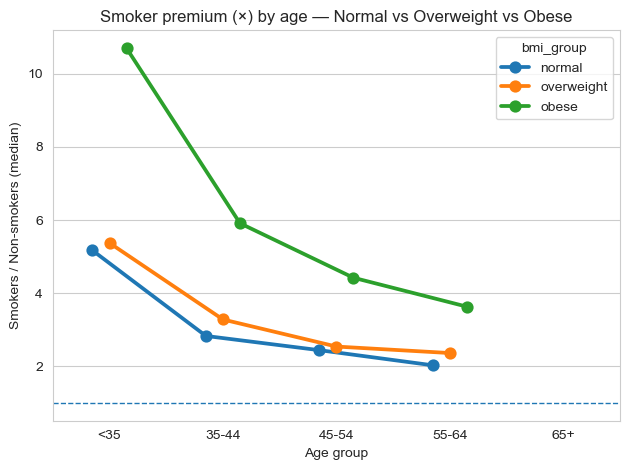

smoker,age_group,bmi_group,premium_ratio
0,<35,normal,5.17
3,35-44,normal,2.83
6,45-54,normal,2.44
9,55-64,normal,2.03
1,<35,overweight,5.37
4,35-44,overweight,3.28
7,45-54,overweight,2.54
10,55-64,overweight,2.37
2,<35,obese,10.70
5,35-44,obese,5.91


In [77]:
# Plot
sns.pointplot(
    data=work, x="age_group", y="premium_ratio",
    hue="bmi_group", hue_order=BMI_GROUP,
    dodge=0.3, markers="o", errorbar=None
)
plt.axhline(1, ls="--", lw=1)
plt.title("Smoker premium (×) by age — Normal vs Overweight vs Obese")
plt.xlabel("Age group"); plt.ylabel("Smokers / Non-smokers (median)")
plt.tight_layout()
plt.show()

work[["age_group","bmi_group","premium_ratio"]].round(2).sort_values(["bmi_group","age_group"])


**Conclusion:**
- The smoker premium is highest at younger ages and especially extreme for obese individuals (<35 pay over 10X more than non-smokers).
- As age increases, the smoker premium decreases across all BMI groups, but obese smokers consistently face the largest relative cost penalty at every age.

# Plot 5 - Focus on Non Smokers

### Feature Engineering

In [78]:
non_smoker = df[df["smoker"]=="no"].copy()
non_smoker.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
1,18,male,33.770,1,no,southeast,1725.55230,<35,obese
2,28,male,33.000,3,no,southeast,4449.46200,<35,obese
3,33,male,22.705,0,no,northwest,21984.47061,<35,normal
4,32,male,28.880,0,no,northwest,3866.85520,<35,overweight
5,31,female,25.740,0,no,southeast,3756.62160,<35,overweight


In [79]:
med_age_bmi = (non_smoker.groupby(["age_group","bmi_group"],observed=True)["charges"]
                 .median().reset_index())
med_age_bmi.head()

,age_group,bmi_group,charges
0,<35,normal,3176.287700
1,<35,overweight,3392.976800
2,<35,obese,3401.840175
3,35-44,normal,6877.980100
4,35-44,overweight,6632.523475


### Plot

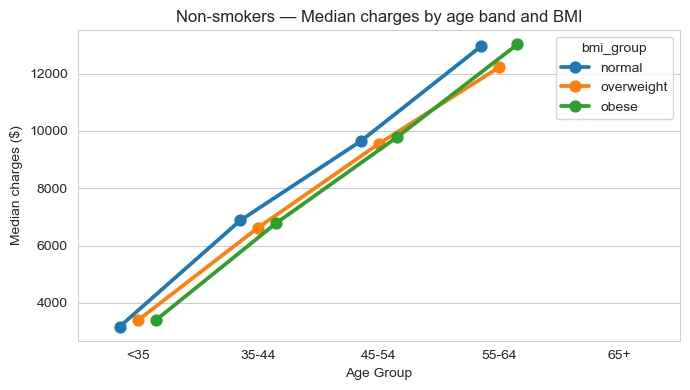

bmi_group   normal  overweight    obese
age_group                              
<35         3176.0      3393.0   3402.0
35-44       6878.0      6633.0   6789.0
45-54       9644.0      9553.0   9778.0
55-64      12957.0     12224.0  13019.0


In [80]:
plt.figure(figsize=(7,4))
sns.pointplot(data=med_age_bmi, x="age_group", y="charges", hue="bmi_group",
              dodge=0.3, markers="o", errorbar=None)
plt.title("Non-smokers — Median charges by age band and BMI")
plt.xlabel("Age Group"); plt.ylabel("Median charges ($)")
plt.tight_layout(); plt.show()
print(med_age_bmi.pivot(index="age_group", columns="bmi_group", values="charges").round(0))

- For non-smokers, medical charges rise steadily with age, but BMI has little effect.
- Normal, overweight, and obese non-smokers follow almost the same trend, with only minor differences.

**Conclusion: Age is the main driver of costs for non-smokers - not BMI**

# Summary



1.   Smoking greatly increases medical costs, and the effect is amplified when combined with obesity
2.   For obese individuals, smoking adds a large and consistent cost premium of about $ 33-34K across all age groups.
3.   The smoker premium is highest at younger ages and especially extreme for obese individuals (<35 pay over 10X more than non-smokers).
4.   Obesity by itself is a modest cost factor, much smaller than the effect of smoking.However,when combined with smoking,it becomes an aggravating factor
5. Age is the main driver of costs for non-smokers - not BMI